In [1]:
# Importing the library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
#(1)loading the Datasets

In [4]:
data=pd.read_excel("1553768847_housing.xlsx")



In [5]:
# Print few rows of this data
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100


In [6]:
# Extract input (X) and output (Y) data from the dataset

In [7]:
X=data.drop("median_house_value",axis=1)
y=data["median_house_value"]

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [9]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [10]:
# checking the missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
data["total_rooms"].unique()

array([  880,  7099,  1467, ...,  4598,   272, 10035], dtype=int64)

In [12]:
data["total_bedrooms"].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [13]:
data["total_bedrooms"].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

<AxesSubplot:>

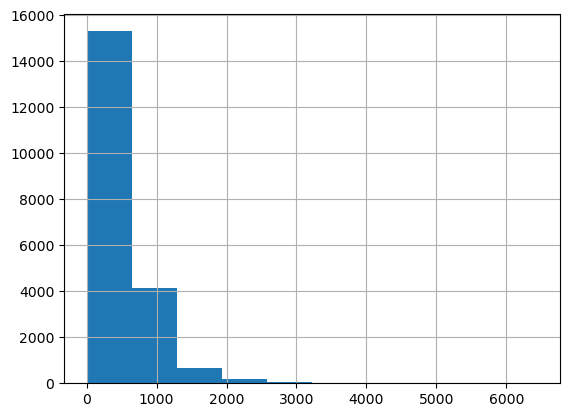

In [14]:
data["total_bedrooms"].hist()

In [15]:
#(2) Handling the missing value
#Fill the missing values with the mean of the respective column.

In [16]:
data["total_bedrooms"]=data["total_bedrooms"].fillna(data["total_bedrooms"].mean())

In [17]:
# Again checking the missing value of the data
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [18]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [20]:
#(3) encode categigical data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [22]:
#checking shape of data
data.shape

(20640, 10)

In [23]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
# Import label encoder


In [25]:
# label_encoder object knows how to understand word labels.
#label_encoder = LabelEncoder()

In [26]:
# Encode labels in column 'ocean_proximity'.
#data['ocean_proximity']= label_encoder.fit_transform(data['ocean_proximity'])

In [27]:
data1 = pd.get_dummies(data["ocean_proximity"],drop_first=True)

In [28]:
data1

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [29]:
data=pd.concat([data1,data],axis=1)

In [30]:
data.head(2)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0,0,1,0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,0,0,1,0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INLAND              20640 non-null  uint8  
 1   ISLAND              20640 non-null  uint8  
 2   NEAR BAY            20640 non-null  uint8  
 3   NEAR OCEAN          20640 non-null  uint8  
 4   longitude           20640 non-null  float64
 5   latitude            20640 non-null  float64
 6   housing_median_age  20640 non-null  int64  
 7   total_rooms         20640 non-null  int64  
 8   total_bedrooms      20640 non-null  float64
 9   population          20640 non-null  int64  
 10  households          20640 non-null  int64  
 11  median_income       20640 non-null  float64
 12  ocean_proximity     20640 non-null  object 
 13  median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1), uint8(4)
memory usage: 1.7+ MB


In [32]:
data

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0,0,1,0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,0,0,1,0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,0,0,1,0,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,0,0,1,0,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,0,0,1,0,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1,0,0,0,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,1,0,0,0,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,1,0,0,0,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,1,0,0,0,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [33]:
data.drop("ocean_proximity",axis=1,inplace=True)

In [34]:
data.head(2)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,1,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,0,0,1,0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INLAND              20640 non-null  uint8  
 1   ISLAND              20640 non-null  uint8  
 2   NEAR BAY            20640 non-null  uint8  
 3   NEAR OCEAN          20640 non-null  uint8  
 4   longitude           20640 non-null  float64
 5   latitude            20640 non-null  float64
 6   housing_median_age  20640 non-null  int64  
 7   total_rooms         20640 non-null  int64  
 8   total_bedrooms      20640 non-null  float64
 9   population          20640 non-null  int64  
 10  households          20640 non-null  int64  
 11  median_income       20640 non-null  float64
 12  median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), uint8(4)
memory usage: 1.5 MB


In [36]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [37]:
# import the datasets into train test split on the ratio of 80:20
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [38]:
#Standardize training and test datasets.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X,y)
#X_train_std = scaler.transform(X_train)
#X_test_std = scaler.transform(X_test)


StandardScaler()

In [40]:
# perform linear regression on the datasets

In [45]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X,y)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [46]:
linear_model.score(X_train,y_train)

0.6492769368633792

In [47]:
print(linear_model.intercept_)
print(linear_model.coef_)

-2235716.9624862904
[-3.97196762e+04  1.56041971e+05 -3.68975069e+03  4.74740208e+03
 -2.64582900e+04 -2.51971995e+04  1.05786379e+03 -4.77253023e+00
  7.22895875e+01 -3.92618423e+01  7.69408613e+01  3.87749138e+04]


In [48]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred=linear_model.predict(X_test)

In [51]:
# Decision tree regression

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [54]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred=regressor.predict(X_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [57]:
print(sqrt(mean_squared_error(y_test,y_pred)))

69506.76680775467


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
regressor2=RandomForestRegressor()

In [60]:
regressor2.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
y_pred2=regressor2.predict(X_test)

In [62]:
print(sqrt(mean_squared_error(y_test,y_pred2)))

48991.175108315394


In [63]:
# Bonus Exercise Performed linear regression with one variable

In [64]:
features_cols=["median_income"]
X=data[features_cols]
y=data.median_house_value